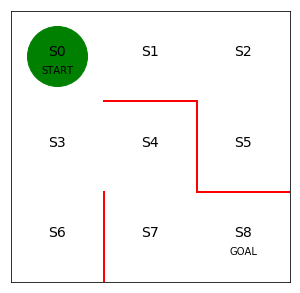

In [50]:
# Jupyterでmatplotlibを使用する宣言と、使用するライブラリの定義
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 初期位置での迷路の様子

# 図を描く大きさと、図の変数名を宣言
fig = plt.figure(figsize=(5, 5))
ax = plt.gca()

# 赤い壁を描く
plt.plot([1, 1], [0, 1], color='red', linewidth=2)
plt.plot([1, 2], [2, 2], color='red', linewidth=2)
plt.plot([2, 2], [2, 1], color='red', linewidth=2)
plt.plot([2, 3], [1, 1], color='red', linewidth=2)

# 状態を示す文字S0～S8を描く
plt.text(0.5, 2.5, 'S0', size=14, ha='center')
plt.text(1.5, 2.5, 'S1', size=14, ha='center')
plt.text(2.5, 2.5, 'S2', size=14, ha='center')
plt.text(0.5, 1.5, 'S3', size=14, ha='center')
plt.text(1.5, 1.5, 'S4', size=14, ha='center')
plt.text(2.5, 1.5, 'S5', size=14, ha='center')
plt.text(0.5, 0.5, 'S6', size=14, ha='center')
plt.text(1.5, 0.5, 'S7', size=14, ha='center')
plt.text(2.5, 0.5, 'S8', size=14, ha='center')
plt.text(0.5, 2.3, 'START', ha='center')
plt.text(2.5, 0.3, 'GOAL', ha='center')

# 描画範囲の設定と目盛りを消す設定
ax.set_xlim(0, 3)
ax.set_ylim(0, 3)
plt.tick_params(axis='both', which='both', bottom='off', top='off',
                labelbottom='off', right='off', left='off', labelleft='off')

# 現在値S0に緑丸を描画する
line, = ax.plot([0.5], [2.5], marker="o", color='g', markersize=60)

plt.show()

# 方策の実装

In [51]:
# 初期の方策を決定するパラメータtheta_0を設定
# 行は状態0～7、列は移動方向で↑、→、↓、←を表す
theta_0 = np.array([[np.nan, 1, 1, np.nan],  # s0
                    [np.nan, 1, np.nan, 1],  # s1
                    [np.nan, np.nan, 1, 1],  # s2
                    [1, 1, 1, np.nan],  # s3
                    [np.nan, np.nan, 1, 1],  # s4
                    [1, np.nan, np.nan, np.nan],  # s5
                    [1, np.nan, np.nan, np.nan],  # s6
                    [1, 1, np.nan, np.nan],  # s7、※s8はゴールなので、方策はなし
                    ])


# 方策パラメータthetaを行動方策piに変換する関数の定義
def simple_convert_into_pi_from_theta(theta):
    '''単純に割合を計算する'''
 
    [m, n] = theta.shape  # thetaの行列サイズを取得
    pi = np.zeros((m, n))
    for i in range(0, m):
        pi[i, :] = theta[i, :] / np.nansum(theta[i, :])  # 割合の計算
 
    pi = np.nan_to_num(pi)  # nanを0に変換
 
    return pi

# 初期の方策pi_0を求める
pi_0 = simple_convert_into_pi_from_theta(theta_0)

# エージェントが方策に従いゴールを目指す部分の実装

In [52]:
# 1step移動後の状態sを求める関数を定義
def get_next_s(pi, s):
    direction = ["up", "right", "down", "left"]
    # pi[s,:]の確率に従って、directionが選択される
    next_direction = np.random.choice(direction, p=pi[s, :])
 
    if next_direction == "up":
        s_next = s - 3  # 上に移動するときは状態の数字が3小さくなる
    elif next_direction == "right":
        s_next = s + 1  # 右に移動するときは状態の数字が1大きくなる
    elif next_direction == "down":
        s_next = s + 3  # 下に移動するときは状態の数字が3大きくなる
    elif next_direction == "left":
        s_next = s - 1  # 左に移動するときは状態の数字が1小さくなる
 
    return s_next

# 迷路を解く関数の定義
def goal_maze(pi):
    s = 0  # スタート地点
    state_history = [0]  # エージェントの移動を記録するリスト
 
    while (1):  # ゴールするまでループ
        next_s = get_next_s(pi, s)
        state_history.append(next_s)  # 記録リストに次の状態（エージェントの位置）を追加
 
        if next_s == 8:  # ゴール地点なら終了
            break
        else:
            s = next_s
 
    return state_history


In [53]:
state_history = goal_maze(pi_0)

# エージェントの移動を可視化
[参考URL](http://louistiao.me/posts/notebooks/embedding-matplotlib-animations-in-jupyter-notebooks/)

In [65]:
from matplotlib import animation
from IPython.display import HTML
 
def init():
    # 背景画像の初期化
    line.set_data([], [])
    return (line,)

def animate(i):
    # フレームごとの描画内容
    state = state_history[i]  # 現在の場所を描く
    x = (state % 3) + 0.5  # 状態のx座標は、3で割った余り+0.5
    y = 2.5 - int(state / 3)  # y座標は3で割った商を2.5から引く
    line.set_data(x, y)
    return (line,)

#　初期化関数とフレームごとの描画関数を用いて動画を作成
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=len(
    state_history), interval=200, repeat=False)
 
HTML(anim.to_html5_video())

# 2種類のアルゴリズム
　1つ目の方法は方策に従って行動しゴールにたどり着いたときに、早くゴールできたケースで実行した行動（action）は重要だと考え、その行動を今後多く取り入れるように方策を更新する作戦です。つまり、うまくいったケースの行動を重要視する作戦です。

　2つ目の方法はゴールから逆算して、ゴールの1つ手前、2つ手前の位置（状態）へと順々に誘導していく作戦です。つまり、ゴール以外の位置（状態）にも価値（優先度）をつけてあげる作戦です。

　実はこれら2つの作戦には名前があり、1つ目の方法は方策反復法、2つ目の方法は価値反復法と呼ばれます。今回は1つ目の方策反復法の具体的アルゴリズムである方策勾配法（Policy Gradient Method）を実装します。

# softmax関数による方策$\pi_{\theta}(s,a)$の実装

In [55]:
# 方策パラメータthetaを行動方策piにソフトマックス関数で変換する手法の定義
def softmax_convert_into_pi_from_theta(theta):
    '''ソフトマックス関数で割合を計算する'''
    beta =1.0
    [m, n] = theta.shape  # thetaの行列サイズを取得
    pi = np.zeros((m, n))
 
    exp_theta = np.exp(beta*theta) # thetaをexp(theta)へと変換
 
    for i in range(0, m):
        # pi[i, :] = theta[i, :] / np.nansum(theta[i, :])  # simpleに割合の計算の場合
        pi[i, :] = exp_theta[i, :] / np.nansum(exp_theta[i, :])  # softmax
 
    pi = np.nan_to_num(pi)  # nanを0に変換
 
    return pi

# エージェントがsoftmax方策に従いゴールを目指す部分

In [56]:
# 行動と1step移動後の状態sとを求める関数を定義
def get_action_and_next_s(pi, s):
    direction = ["up", "right", "down", "left"]
    # pi[s,:]の確率に従って、directionが選択される
    next_direction = np.random.choice(direction, p=pi[s, :])
    
    if next_direction == "up":
        action = 0
        s_next = s - 3  # 上に移動するときは状態の数字が3小さくなる
    elif next_direction == "right":
        action = 1
        s_next = s + 1  # 右に移動するときは状態の数字が1大きくなる
    elif next_direction == "down":
        action = 2
        s_next = s + 3  # 下に移動するときは状態の数字が3大きくなる
    elif next_direction == "left":
        action = 3
        s_next = s - 1  # 左に移動するときは状態の数字が1小さくなる
    return [action, s_next]

In [57]:
# 迷路を解く関数の定義、状態と行動の履歴を出力
def goal_maze_ret_s_a(pi):
    s = 0  # スタート地点
    s_a_history = [[0, np.nan]]  # エージェントの移動を記録するリスト
 
    while (1):  # ゴールするまでループ
        [action, next_s] = get_action_and_next_s(pi, s)
        s_a_history[-1][1] = action
        # 現在の状態（つまり一番最後なのでindex=-1）の行動を代入
 
        s_a_history.append([next_s, np.nan])
        # 次の状態を代入。行動はまだ分からないのでnanにしておく
 
        if next_s == 8:  # ゴール地点なら終了
            break
        else:
            s = next_s
 
    return s_a_history

In [58]:
s_a_history = goal_maze_ret_s_a(pi_0)

# 方策勾配法に従い方策を更新する
![image](スクリーンショット 2018-04-28 13.47.08.png)

In [59]:
# thetaの更新関数を定義します
def update_theta(theta, pi, s_a_history):
    eta = 0.1  # 学習率
    T = len(s_a_history) - 1  # ゴールまでの総ステップ数
 
    [m, n] = theta.shape  # thetaの行列サイズを取得
    delta_theta = theta.copy()  # Δthetaの元を作成、ポインタ参照なので、delta_theta = thetaはダメ
 
    # delta_thetaを要素ごとに求めます
    for i in range(0, m):
        for j in range(0, n):
            if not(np.isnan(theta[i, j])):  # thetaがnanでない場合
                # 履歴から状態iのものを取り出すリスト内包表記です
                SA_i = [SA for SA in s_a_history if SA[0] == i]
                SA_ij = [SA for SA in s_a_history if SA ==
                         [i, j]]  # 状態iで行動jをしたものを取り出す
                N_i = len(SA_i)  # 状態iで行動した総回数
                N_ij = len(SA_ij)  # 状態iで行動jをとった回数
                delta_theta[i, j] = (N_ij + pi[i, j] * N_i) / T
 
    new_theta = theta + eta * delta_theta
 
    return new_theta

一回のエピソードによる更新

In [60]:
new_theta = update_theta(theta_0, pi_0, s_a_history)
pi = softmax_convert_into_pi_from_theta(new_theta)
print(pi)

[[0.         0.50241934 0.49758066 0.        ]
 [0.         0.50201612 0.         0.49798388]
 [0.         0.         0.49879032 0.50120968]
 [0.33297472 0.33405056 0.33297472 0.        ]
 [0.         0.         0.5        0.5       ]
 [1.         0.         0.         0.        ]
 [1.         0.         0.         0.        ]
 [0.49959677 0.50040323 0.         0.        ]]


# 方策勾配で迷路を解く実装

In [61]:
# 方策勾配法で迷路を解く
stop_epsilon = 10**-8  # 10^-8よりも方策に変化が少なくなったら学習終了とする
 
theta = theta_0
pi = pi_0
 
is_continue = True
count = 1
while is_continue:  # is_continueがFalseになるまで繰り返す
    s_a_history = goal_maze_ret_s_a(pi)  # 方策πで迷路内を探索した履歴を求める
    new_theta = update_theta(theta, pi, s_a_history)  # パラメータΘを更新
    new_pi = softmax_convert_into_pi_from_theta(new_theta)  # 方策πの更新
 
    print(np.sum(np.abs(new_pi - pi)))  # 方策の変化を出力
    print("迷路を解くのにかかったステップ数は" + str(len(s_a_history) - 1) + "です")
 
    if np.sum(np.abs(new_pi - pi)) < stop_epsilon:
        is_continue = False
    else:
        theta = new_theta
        pi = new_pi

0.010374865641673059
迷路を解くのにかかったステップ数は30です
0.008819966484487685
迷路を解くのにかかったステップ数は28です
0.006570031254963249
迷路を解くのにかかったステップ数は138です
0.009520338273156348
迷路を解くのにかかったステップ数は56です
0.006693873193342137
迷路を解くのにかかったステップ数は88です
0.017593572494919385
迷路を解くのにかかったステップ数は14です
0.01892783270040771
迷路を解くのにかかったステップ数は20です
0.010616953069679524
迷路を解くのにかかったステップ数は56です
0.017526715609097743
迷路を解くのにかかったステップ数は20です
0.005642426820099855
迷路を解くのにかかったステップ数は96です
0.013918063152062565
迷路を解くのにかかったステップ数は28です
0.007781606329803237
迷路を解くのにかかったステップ数は76です
0.014174661490150064
迷路を解くのにかかったステップ数は14です
0.01077030839328258
迷路を解くのにかかったステップ数は42です
0.01696152089302
迷路を解くのにかかったステップ数は20です
0.012165947036922697
迷路を解くのにかかったステップ数は14です
0.019881709381360912
迷路を解くのにかかったステップ数は10です
0.049468852469029434
迷路を解くのにかかったステップ数は4です
0.015236552690762406
迷路を解くのにかかったステップ数は10です
0.02518776713498061
迷路を解くのにかかったステップ数は8です
0.010628825981924439
迷路を解くのにかかったステップ数は38です
0.03436882941716607
迷路を解くのにかかったステップ数は6です
0.02194140252250515
迷路を解くのにかかったステップ数は18です
0.038040713010105254
迷

学習後の$\pi$

In [62]:
pi

array([[0.00000000e+00, 9.63066721e-09, 9.99999990e-01, 0.00000000e+00],
       [0.00000000e+00, 4.28249713e-01, 0.00000000e+00, 5.71750287e-01],
       [0.00000000e+00, 0.00000000e+00, 4.96556339e-01, 5.03443661e-01],
       [1.57392756e-08, 9.99999955e-01, 2.95235644e-08, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 9.99999995e-01, 5.19280553e-09],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.77261907e-08, 9.99999962e-01, 0.00000000e+00, 0.00000000e+00]])

# 可視化

In [66]:
def init():
    # 背景画像の初期化
    line.set_data([], [])
    return (line,)
 
def animate(i):
    # フレームごとの描画内容
    state = s_a_history[i][0]  # 現在の場所を描く
    x = (state % 3) + 0.5  # 状態のx座標は、3で割った余り+0.5
    y = 2.5 - int(state / 3)  # y座標は3で割った商を2.5から引く
    line.set_data(x, y)
    return (line,)


#　初期化関数とフレームごとの描画関数を用いて動画を作成
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=len(
    s_a_history), interval=200, repeat=False)
 
HTML(anim.to_html5_video())

# なぜsoftmax
今回の迷路課題のように方策を表形式表現で表した場合、softmax関数を使用してパラメータθから方策πへの変換を行うと、パラメータθが負の値になっても確率が計算できるという利点があります。

　またパラメータθの更新を方策勾配法で解くために、方策勾配定理[1]と呼ばれる定理が存在します。そして方策勾配定理を近似的に実装するアルゴリズムにREINFORCEアルゴリズムと呼ばれるものが存在します。

　softmax関数を使用した確率への変換とREINFORCEアルゴリズムに従うと、今回使用したθの更新式が導出されます。またsoftmax関数には、この更新式の導出を解析的に求めやすいという利点もあります。より詳細に数理的背景を知りたい方は[2, 3]をご参照ください。